# Frequent Twitter Miles

Airlines get a lot of flack on twitter, especially from big time Journalists who think they are the only ones affected by flying. Well lets see what kind of tone everyone else takes when tweeting at them.

## Instructions

Your goal is to analyze 1500 tweets for 3 popular airlines and run a VADER sentiment analysis on them. 

Taking the usual "Compound", "Positive", "Negative" and "Netural" results and print them to Ipython Notebook

In [27]:
import json
import tweepy 
import os
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [29]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
# Target Search Term
target_terms = ("@SouthwestAir", "@AmericanAir", "@SpiritAirlines")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

sentiment_array = []
oldest_tweet = ""

In [31]:

for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    airplane_text_list = []
    text = ''
    for x in range(15):
        time.sleep(1)
        public_tweets = api.search(target, count=100,
                                   result_type="recent",
                                   max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            text += ' '
            text += tweet['text']
            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
            oldest_tweet = tweet["id_str"]
            
    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}
    airplane_text_list.append(text)
    # Print the Sentiments
    print(sentiment)
    print("")


{'User': '@SouthwestAir', 'Compound': 0.27407928994082836, 'Positive': 0.16733136094674553, 'Neutral': 0.042969230769230773, 'Negative': 0.7897005917159764, 'Tweet Count': 845}

{'User': '@AmericanAir', 'Compound': 0.12375411764705882, 'Positive': 0.12550117647058823, 'Neutral': 0.060858823529411764, 'Negative': 0.8136258823529412, 'Tweet Count': 850}

{'User': '@SpiritAirlines', 'Compound': 0.0038813822284908283, 'Positive': 0.097748942172073347, 'Neutral': 0.083344146685472492, 'Negative': 0.81890126939351193, 'Tweet Count': 709}



In [32]:
airplane_text_list

[' @BenIdle @SpiritAirlines I’d be a big fan of any airline getting me out of that god forsaken city. @SpiritAirlines we were told a quick 10-20 minute wait for an onboard fix-a paperwork problem. Been sitting for ove… https://t.co/qx1f4Om4ZH @SpiritAirlines have been sitting on the plane for over an hour, was told it would be a 20 minute fix. Is lying how… https://t.co/WU0vQ9UDqc @SpiritAirlines Now 50 min delay. Yall hiring for flight attendants?  @Delta , @SpiritAirlines , @AmericanAir Clothes are packed and ready for training :) . @SpiritAirlines has the worst customer service.  I will not be flying through them ever again. #CustomerService… https://t.co/b6j28lyKT0 RT @fishh3088: 30 min delay bc a small piece of plastic came off @SpiritAirlines 30 min delay bc a small piece of plastic came off @SpiritAirlines @SpiritAirlines May I have a follow? RT @loserisabella: @SpiritAirlines fine! i’ll do it myself! but when i take spirit down all the credit will go to me!! and i’ll be the her

## Regular Expressions

A dark art to be sure. The regextester can be of some help. Don't re-invent the wheel. Whatever you want to do has probably been done before. I tend to use stackoverflow for this...

https://www.regextester.com/21

In [33]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [53]:
clean_tweets = clean_tweet(airplane_text_list[0])
clean_tweets

'I d be a big fan of any airline getting me out of that god forsaken city we were told a quick 10 20 minute wait for an onboard fix a paperwork problem Been sitting for ove have been sitting on the plane for over an hour was told it would be a 20 minute fix Is lying how Now 50 min delay Yall hiring for flight attendants Clothes are packed and ready for training has the worst customer service I will not be flying through them ever again CustomerService RT 30 min delay bc a small piece of plastic came off 30 min delay bc a small piece of plastic came off May I have a follow RT fine i ll do it myself but when i take spirit down all the credit will go to me and i ll be the hero RT i m gonna start a hate club rt to join we can collectively talk about how much spirit sucks and how th RT Dude you need to be flying with cheap flights and never delayed Idk why anyb Dude you need to be flying with cheap flights and never delayed Idk wh really 40lb bag limit everyone else is 50lb 6lb over you guy

* pip install wordcloud
* conda install -c https://conda.anaconda.org/amueller wordcloud

https://github.com/amueller/word_cloud


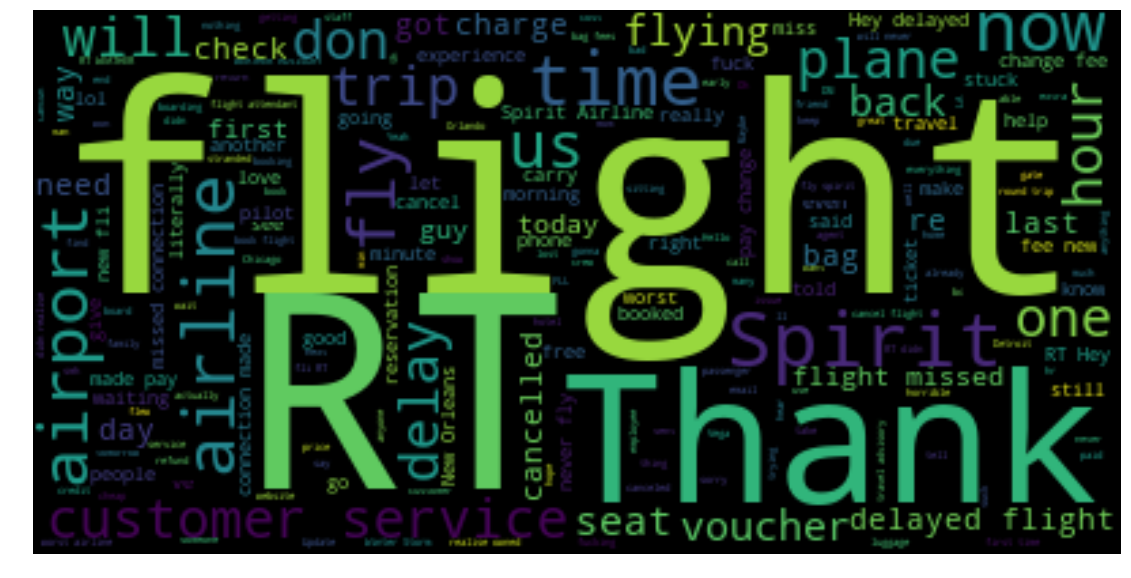

In [61]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(clean_tweets)
import matplotlib.pyplot as plt
# lower max_font_size
wc = WordCloud(width=1600, height=800, max_words=1000, margin=0,
               random_state=1).generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


plt.show()

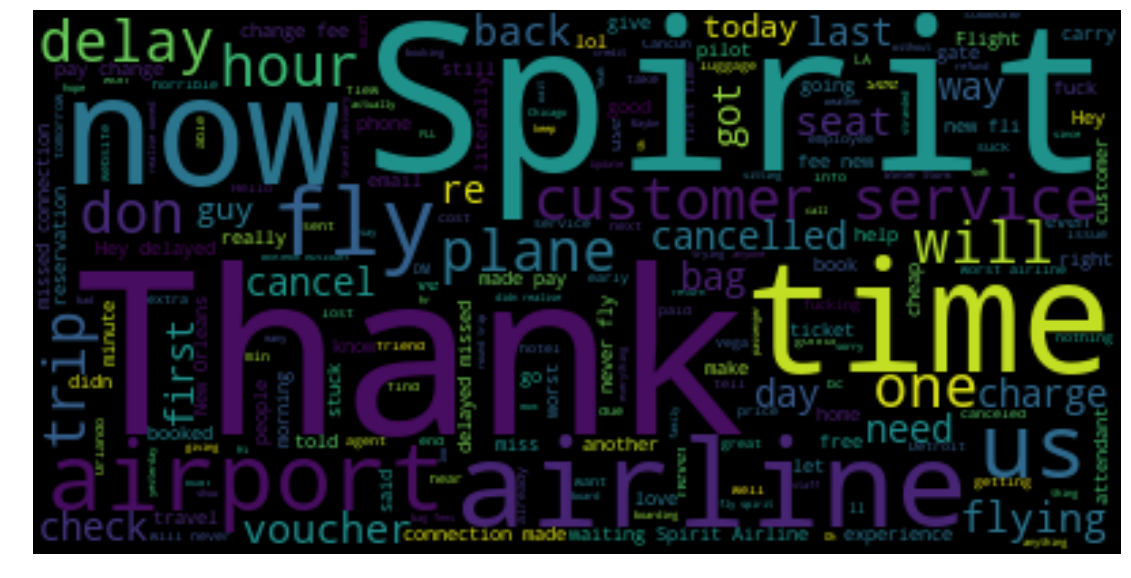

In [63]:
clean_tweets = clean_tweets.replace('flight', '')
clean_tweets = clean_tweets.replace('RT', '')

wordcloud = WordCloud().generate(clean_tweets)
import matplotlib.pyplot as plt
# lower max_font_size
wc = WordCloud(width=1600, height=800, max_words=1000, margin=0,
               random_state=1).generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


plt.show()

In [64]:
# Show cool alice word map